## Exercise 07 : Heatmap

In [242]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import sqlite3

In [243]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [244]:
query = """
        select uid, timestamp from checker
        where uid like 'user_%';
        """

df = pd.read_sql(query, conn, parse_dates='timestamp')
df

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370
...,...,...
3202,user_1,2020-05-21 20:19:06.872761
3203,user_1,2020-05-21 20:22:41.785725
3204,user_1,2020-05-21 20:22:41.877806
3205,user_1,2020-05-21 20:37:00.129678


In [245]:
names = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.dayofweek
df['name_day'] = df['day'].map(names)
df

,uid,timestamp,hour,day,name_day
0,user_4,2020-04-17 05:19:02.744528,5,4,Fri
1,user_4,2020-04-17 05:22:35.249331,5,4,Fri
2,user_4,2020-04-17 05:22:45.549397,5,4,Fri
3,user_4,2020-04-17 05:34:14.691200,5,4,Fri
4,user_4,2020-04-17 05:34:24.422370,5,4,Fri
...,...,...,...,...,...
3202,user_1,2020-05-21 20:19:06.872761,20,3,Thu
3203,user_1,2020-05-21 20:22:41.785725,20,3,Thu
3204,user_1,2020-05-21 20:22:41.877806,20,3,Thu
3205,user_1,2020-05-21 20:37:00.129678,20,3,Thu


In [246]:
days = df.groupby(['uid', 'name_day'])['timestamp'].count().rename('count')
days = days.reset_index()
days

,uid,name_day,count
0,user_0,Mon,3
1,user_1,Sat,1
2,user_1,Sun,43
3,user_1,Thu,39
4,user_1,Wed,1
...,...,...,...
133,user_7,Tue,5
134,user_7,Wed,3
135,user_8,Sat,46
136,user_8,Sun,26


In [247]:
hours = df.groupby(['uid', 'hour'])['timestamp'].count().rename('count')
hours = hours.reset_index()
hours

,uid,hour,count
0,user_0,17,3
1,user_1,12,1
2,user_1,16,1
3,user_1,17,8
4,user_1,19,21
...,...,...,...
303,user_8,16,14
304,user_8,17,7
305,user_8,19,7
306,user_8,20,1


In [248]:
heatmap_days = days.pivot(index='name_day', columns='uid', values='count')
heatmap_days.fillna(0, inplace=True)

sort_commit = heatmap_days.sum(axis=0)
sort_commit = sort_commit.sort_values(ascending=False).index
heatmap_days = heatmap_days[sort_commit]

days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
heatmap_days = heatmap_days.reindex(index=days_of_week)

heatmap_days

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_11,user_7,user_22,user_23,user_0
name_day,,,,,,,,,,,,,,,,,,,,,
Mon,35.0,50.0,24.0,14.0,7.0,0.0,23.0,5.0,0.0,46.0,...,8.0,10.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0
Tue,86.0,87.0,131.0,44.0,9.0,1.0,0.0,0.0,16.0,11.0,...,4.0,5.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0
Wed,33.0,0.0,32.0,15.0,0.0,34.0,8.0,0.0,37.0,0.0,...,1.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0
Thu,108.0,17.0,4.0,40.0,78.0,51.0,96.0,7.0,77.0,7.0,...,17.0,14.0,15.0,5.0,2.0,0.0,0.0,2.0,6.0,0.0
Fri,61.0,0.0,0.0,10.0,10.0,2.0,7.0,35.0,1.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sat,0.0,79.0,31.0,66.0,21.0,16.0,3.0,90.0,4.0,3.0,...,32.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
Sun,45.0,26.0,13.0,44.0,51.0,69.0,28.0,7.0,2.0,8.0,...,0.0,31.0,27.0,20.0,9.0,8.0,0.0,1.0,0.0,0.0


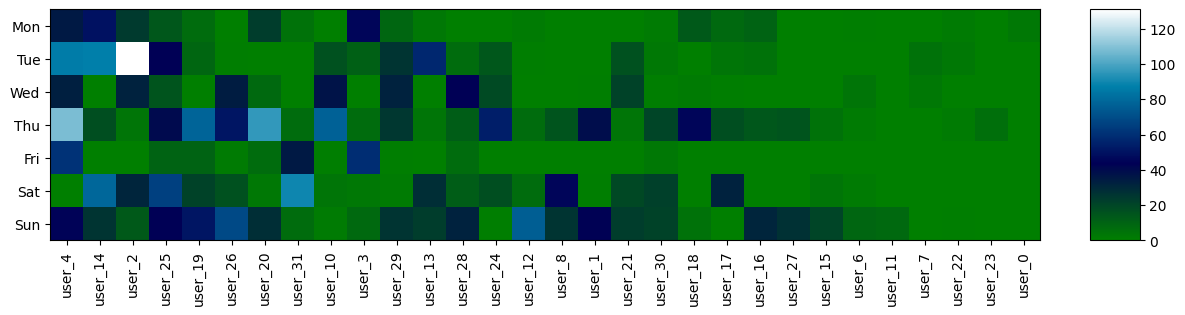

In [249]:
fig, ax = plt.subplots(figsize=(15, 3))
im = ax.imshow(heatmap_days, cmap='ocean')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.5)
ax.set_xticks(range(heatmap_days.shape[1]))
ax.set_yticks(range(heatmap_days.shape[0]))
ax.set_xticklabels(heatmap_days.columns, rotation=90)
ax.set_yticklabels(heatmap_days.index)

plt.colorbar(im, cax=cax)

plt.show()

In [250]:
heatmap_hour = hours.pivot(index='hour', columns='uid', values='count')
heatmap_hour.fillna(0, inplace=True)

sort_commit = heatmap_hour.sum(axis=0)
sort_commit = sort_commit.sort_values(ascending=False).index
heatmap_hour = heatmap_hour[sort_commit]

heatmap_hour

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_11,user_7,user_22,user_23,user_0
hour,,,,,,,,,,,,,,,,,,,,,
0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,13.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,3.0,6.0,0.0,0.0,10.0,2.0,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,6.0,0.0,0.0,0.0,5.0,2.0,0.0,9.0,6.0,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,0.0,4.0,13.0,0.0,0.0,3.0,0.0,1.0,0.0,3.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0
10,26.0,2.0,42.0,18.0,20.0,16.0,0.0,0.0,0.0,2.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


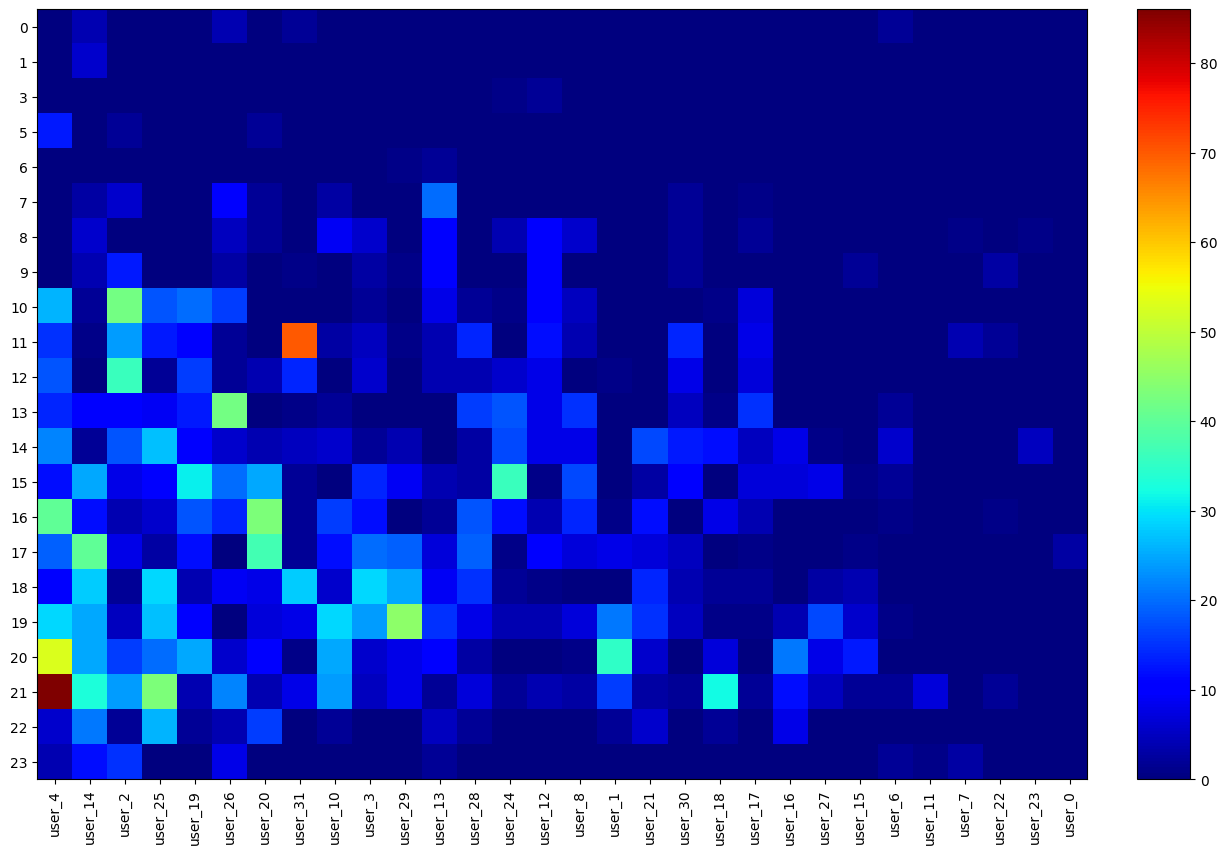

In [251]:
fig, ax = plt.subplots(figsize=(20, 10))
im = ax.imshow(heatmap_hour, cmap='jet')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.5)
ax.set_xticks(range(heatmap_hour.shape[1]))
ax.set_yticks(range(heatmap_hour.shape[0]))
ax.set_xticklabels(heatmap_hour.columns, rotation=90)
ax.set_yticklabels(heatmap_hour.index)

plt.colorbar(im, cax=cax)

plt.show()

“Which user has the most commits on Tue?” 
- The answer: user_4.

“Which user has the most commits on Thu?”
- The answer: user_2.

“On which weekday do the users not like making a lot of commits?” 
- The answer: Friday.

“Which user at which hour made the largest number of commits?”
 - The answer, for example: user_4, 21

In [252]:
conn.close()